In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [33]:
X_train.shape

(60000, 28, 28)

In [34]:
X_test.shape

(10000, 28, 28)

In [35]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [47]:
X_train = X_train/255
X_test = X_test/255

In [48]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

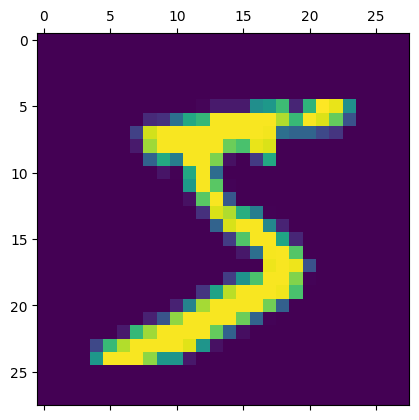

In [49]:
plt.matshow(X_train[0])

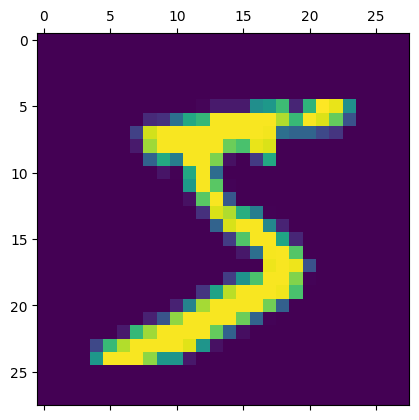

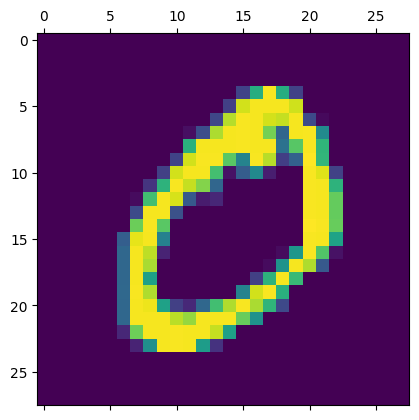

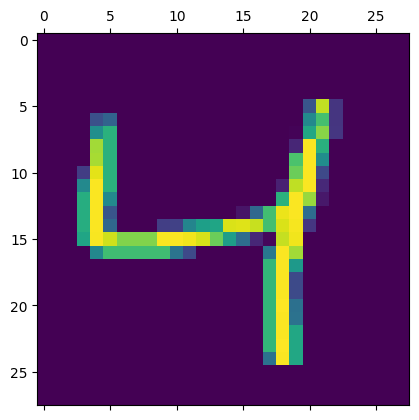

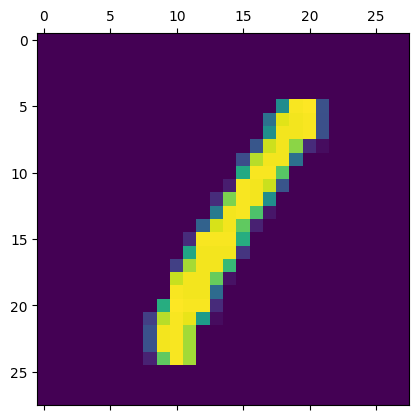

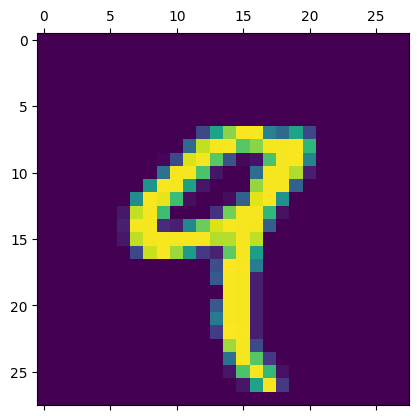

In [50]:
for i in range (0,5):
    plt.matshow(X_train[i])

In [51]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

# convert 2D to 1D

In [52]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [72]:
# done without hidden layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 693us/step - loss: 0.4751 - accuracy: 0.8759
Epoch 2/5
1875/1875 [==============================] - 1s 666us/step - loss: 0.3040 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 1s 677us/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 1s 673us/step - loss: 0.2732 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 1s 681us/step - loss: 0.2669 - accuracy: 0.9254


In [46]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit_transform(X_train_flattened)
# scaler.fit_transform(X_test_flattened)
# X_train_flattened[0]

In [73]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 0s 604us/step - loss: 0.2649 - accuracy: 0.9270


[0.26491400599479675, 0.9269999861717224]

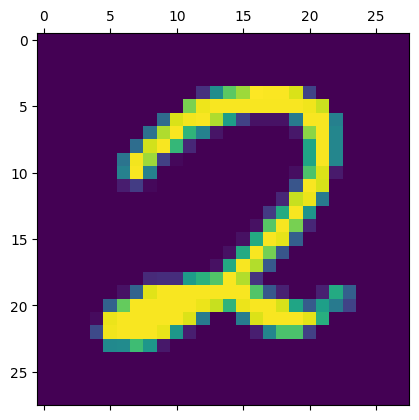

In [74]:
plt.matshow(X_test[35])

In [75]:
y_pred = model.predict(X_test_flattened)
y_pred[35]

313/313 [==============================] - 0s 530us/step


array([1.11672275e-01, 1.33481855e-03, 9.99042869e-01, 4.29329664e-01,
       1.32793120e-05, 5.59448540e-01, 3.55141866e-03, 1.23428563e-07,
       5.46146750e-01, 1.36095412e-06], dtype=float32)

In [76]:
np.argmax(y_pred[35])

2

In [77]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [78]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [79]:
cm = tf.math.confusion_matrix(labels = Y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1119,    2,    2,    0,    1,    4,    2,    5,    0],
       [   8,   17,  912,   14,    8,    4,   12,   10,   43,    4],
       [   4,    0,   21,  910,    0,   32,    2,   11,   22,    8],
       [   1,    1,    4,    1,  916,    0,    9,    4,    6,   40],
       [   7,    3,    2,   19,   12,  792,   13,    6,   30,    8],
       [  11,    3,    3,    1,    7,   13,  915,    2,    3,    0],
       [   2,    7,   20,    5,    7,    1,    0,  950,    2,   34],
       [   6,   14,    5,   16,    9,   27,    8,   13,  868,    8],
       [  11,    7,    1,    8,   24,    7,    0,   21,    5,  925]])>

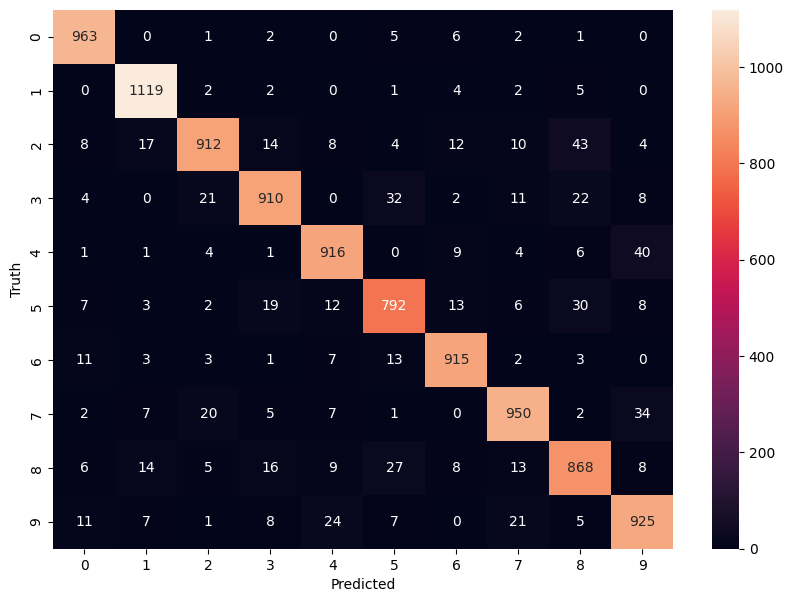

In [80]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [85]:
# we are adding hidden layers
model = keras.Sequential([
    keras.layers.Dense(400, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(150, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1939 - accuracy: 0.9415
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0831 - accuracy: 0.9738
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0562 - accuracy: 0.9824
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0417 - accuracy: 0.9862
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0351 - accuracy: 0.9880


In [86]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 0s 834us/step - loss: 0.0852 - accuracy: 0.9762


[0.08523228764533997, 0.9761999845504761]

In [87]:
y_pred = model.predict(X_test_flattened)
y_pred[35]

313/313 [==============================] - 0s 782us/step


array([1.6458318e-01, 7.7735394e-01, 1.0000000e+00, 7.7832150e-01,
       7.7235121e-08, 1.0752352e-05, 1.2896680e-05, 7.2971076e-01,
       2.6144315e-02, 2.2528594e-04], dtype=float32)

In [88]:
np.argmax(y_pred[35])

2

In [89]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [90]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [91]:
cm = tf.math.confusion_matrix(labels = Y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    1,    1,    0,    0,    1,    2,    1,    3,    2],
       [   1, 1128,    3,    0,    0,    0,    1,    0,    2,    0],
       [   5,    1, 1008,    5,    2,    0,    0,    8,    2,    1],
       [   0,    0,    7,  988,    0,    2,    0,    4,    3,    6],
       [   1,    0,    4,    0,  943,    0,    1,    8,    1,   24],
       [   3,    0,    0,   25,    0,  847,    2,    2,   10,    3],
       [   5,    3,    1,    1,    3,    5,  933,    2,    5,    0],
       [   2,    1,    3,    0,    0,    0,    0, 1013,    1,    8],
       [   1,    0,    5,    4,    2,    1,    0,    5,  952,    4],
       [   2,    3,    0,    5,    4,    1,    0,   10,    3,  981]])>

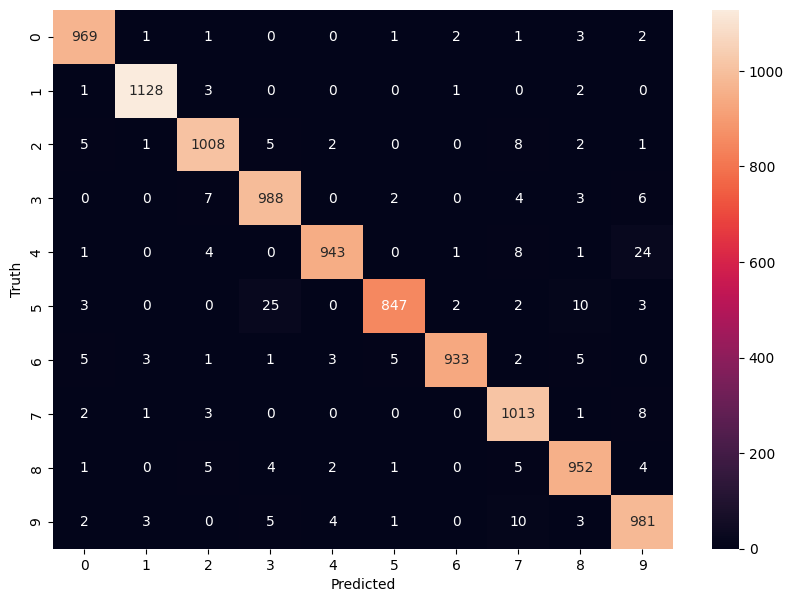

In [92]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [94]:
# done without actually flattening the array using keras function
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 671us/step - loss: 0.4728 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 1s 670us/step - loss: 0.3045 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 1s 672us/step - loss: 0.2836 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 1s 649us/step - loss: 0.2739 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 1s 649us/step - loss: 0.2667 - accuracy: 0.9256
